# Note-1: ReDeeM development and optimization
---

**Author:** Chen Weng

**Date:** November 9, 2023

## Description

This Jupyter Notebook aims reproduce the major analysis in Extended Data Fig. 1

## Related Figures
- Extended Data Fig. 1 [Section 7, Section 8, Section 9]




---

# Install redeemR

In [1]:
#devtools::install_github("chenweng1991/redeemR")

# Import libraries

In [108]:
library(plyr)
library(dplyr)
library(ggplot2)
library(gridExtra)

# Set path

In [2]:
## set main directory to the reproducibility_pub
Dir="/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/reproducibility_pub" # Change this to your actual path **/reproducibility_pub

# Test Conditions - full data, NonGDN

|Condition|Fix|Perm  |BSA | 
|-----|:-----|:---:|:-----:|
|A |0.1% FA|0.1% NP40|1% BSA |
|B |0.1% FA|0.1% NP40|0.01% BSA |
|C |1% PFA|0.1% NP40|1% BSA |
|D |1% PFA|0.1% NP40|0.01% BSA |
|E |1% PFA|-|1% BSA |0.01% BSA |
|F |1% PFA|-|1% BSA |0.01% BSA |

In [68]:
## Read in summary
NonGDN.total.summary<-read.table(paste(Dir,"/data/optimize/atac.fragment.summary.NonGDN",sep=""))
NonGDN.mito.summary<-read.table(paste(Dir,"/data/optimize/atac.fragment.mito.summary.NonGDN",sep=""))
names(NonGDN.total.summary)<-c("cell","Frag","Reads")
names(NonGDN.mito.summary)<-c("cell","mitoFrag","mitoReads")

In [69]:
## Read In Hash Call and Hash Hash Dic
HashDic<-read.csv(paste(Dir,"/data/optimize/NonGDN.HashDic.csv",sep=""),header=F)
HashCall<-read.table(paste(Dir,"/data/optimize/NonGDN_calls.tsv",sep=""),header=T)

In [71]:
## Process the Hash table
HashCall$Group<-mapvalues(HashCall$call,from=HashDic$V1,to=HashDic$V2)
HashCall.non.filtered<-subset(HashCall,sig>=0.6)[,c("cell","Group")]
HashCall.non.filtered$cell<-paste(HashCall.non.filtered$cell,"-1",sep="")

In [72]:
NonGDN.summary<-merge(HashCall.non.filtered,NonGDN.total.summary,by="cell")  %>% merge(.,NonGDN.mito.summary,by="cell")
NonGDN.summary$mitopctReads<-NonGDN.summary$mitoReads/NonGDN.summary$Reads
NonGDN.summary$mitopctFrag<-NonGDN.summary$mitoFrag/NonGDN.summary$Frag
NonGDN.summary$mitocomplex<-NonGDN.summary$mitoFrag/NonGDN.summary$mitoReads

In [73]:
NonGDN.summary %>% group_by(Group) %>% dplyr::summarise(ave.Frag=median(Frag),ave.Reads=median(Reads),ave.mitoFrag=median(mitoFrag),ave.mitoReads=median(mitoReads),ave.mitopctReads=median(mitopctReads),ave.mitopctFrag=median(mitopctFrag),ave.mitocomplex=median(mitocomplex))

Group,ave.Frag,ave.Reads,ave.mitoFrag,ave.mitoReads,ave.mitopctReads,ave.mitopctFrag,ave.mitocomplex
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,14135.0,37110.5,2224.0,5738.5,0.1632430,0.16522285,0.3852464
B,21004.0,54060.0,2940.0,7545.0,0.1572797,0.15767486,0.3853021
C,6297.5,15717.0,2794.0,7091.0,0.5068349,0.49397850,0.3934712
D,6443.5,16016.5,2977.5,7599.0,0.5181792,0.50751914,0.3926778
E,8844.5,22714.5,789.0,1982.5,0.1030958,0.10776873,0.3921300
F,38853.0,98027.0,1364.0,3479.0,0.0472579,0.04586108,0.3877904


# Test Conditions - full data, +GDN

In [78]:
## Read in summary
PlusGDN.total.summary<-read.table(paste(Dir,"/data/optimize/atac.fragment.summary.PlusGDN",sep=""))
PlusGDN.mito.summary<-read.table(paste(Dir,"/data/optimize/atac.fragment.mito.summary.PlusGDN",sep=""))
names(PlusGDN.total.summary)<-c("cell","Frag","Reads")
names(PlusGDN.mito.summary)<-c("cell","mitoFrag","mitoReads")

In [79]:
## Read In Hash Call and Hash Hash Dic
HashDic<-read.csv(paste(Dir,"/data/optimize/PlusGDN.HashDic.csv",sep=""),header=F)
HashCall<-read.table(paste(Dir,"/data/optimize/PlusGDN_calls.tsv",sep=""),header=T)

In [80]:
## Process the Hash table
HashCall$Group<-mapvalues(HashCall$call,from=HashDic$V1,to=HashDic$V2)
HashCall.GDN.filtered<-subset(HashCall,sig>=0.6)[,c("cell","Group")]
HashCall.GDN.filtered$cell<-paste(HashCall.GDN.filtered$cell,"-1",sep="")

In [81]:
PlusGDN.summary<-merge(HashCall.GDN.filtered,PlusGDN.total.summary,by="cell")  %>% merge(.,PlusGDN.mito.summary,by="cell")
PlusGDN.summary$mitopctReads<-PlusGDN.summary$mitoReads/PlusGDN.summary$Reads
PlusGDN.summary$mitopctFrag<-PlusGDN.summary$mitoFrag/PlusGDN.summary$Frag
PlusGDN.summary$mitocomplex<-PlusGDN.summary$mitoFrag/PlusGDN.summary$mitoReads

In [82]:
PlusGDN.summary %>% group_by(Group) %>% dplyr::summarise(ave.Frag=median(Frag),ave.Reads=median(Reads),ave.mitoFrag=median(mitoFrag),ave.mitoReads=median(mitoReads),ave.mitopctReads=median(mitopctReads),ave.mitopctFrag=median(mitopctFrag),ave.mitocomplex=median(mitocomplex))

Group,ave.Frag,ave.Reads,ave.mitoFrag,ave.mitoReads,ave.mitopctReads,ave.mitopctFrag,ave.mitocomplex
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,18148.0,42198.5,2368.5,5461.5,0.14568898,0.14844472,0.4350922
B,19553.5,45643.5,2701.0,6166.5,0.15975147,0.15957085,0.4320403
C,6318.0,14134.0,2891.0,6463.0,0.49657133,0.48510062,0.4403177
D,6541.5,14596.5,3041.0,6815.0,0.50942612,0.50043437,0.4405335
E,4264.0,9640.0,1252.0,2782.0,0.32494220,0.32563256,0.4434297
F,42166.0,95573.5,1594.5,3569.5,0.05002929,0.04906386,0.4363187


# Test condition - Saturation analysis

In [33]:
##Define atac reading function
readSummary<-function(file,nm){
summary<-read.table(file)
names(summary)<-nm
return(summary)
}

##Define atac Process summary
SummaryMergeMedian<-function(HashCall.filtered,total.summary,mito.summary){
summary.merge<-merge(HashCall.filtered,total.summary,by="cell")  %>% merge(.,mito.summary,by="cell")
summary.merge$mitopctReads<-summary.merge$mitoReads/summary.merge$Reads
summary.merge$mitopctFrag<-summary.merge$mitoFrag/summary.merge$Frag
summary.merge$mitocomplex<-summary.merge$mitoFrag/summary.merge$mitoReads
summary.merge.median<-summary.merge %>% group_by(Group) %>% dplyr::summarise(ave.Frag=median(Frag),ave.Reads=median(Reads),ave.mitoFrag=median(mitoFrag),ave.mitoReads=median(mitoReads),ave.mitopctReads=median(mitopctReads),ave.mitopctFrag=median(mitopctFrag),ave.mitocomplex=median(mitocomplex))
return(summary.merge.median)
}

In [43]:
##Define rna reading function
readSummary.rna<-function(f,path.gex=path.non.gex){
Gene<-read.table(paste(path.gex,"/tmp_",f,".UniqGene",sep=""),col.names = c("cell","Gene"))
UMI<-read.table(paste(path.gex,"/tmp_",f,".UniqUMI",sep=""),col.names = c("cell","UMI"))
Reads<-read.table(paste(path.gex,"/tmp_",f,".TotalReads",sep=""),col.names = c("cell","Reads"))
summary<-merge(merge(Gene,UMI,by="cell"),Reads,by="cell")
return(summary)
}
##Define rna processing function
SummaryMergeMedian.rna<-function(HashCall.filtered,GeneSummaries){
summary.merge<-merge(HashCall.filtered,GeneSummaries,by="cell") 
summary.merge.median<-summary.merge %>% group_by(Group) %>% dplyr::summarise(ave.Gene=median(Gene),ave.UMI=median(UMI),ave.Reads=median(Reads))
return(summary.merge.median)
}

In [45]:
## Define paths
Downfactor<-c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99)
path.non<-paste(Dir,"/data/optimize/NonGDN.DownsampleTest/",sep="")
path.GDN<-paste(Dir,"/data/optimize/PlusGDN.DownsampleTest/",sep="")
path.non.gex<-paste(Dir,"/data/optimize/NonGDN.DownsampleTest.gex/",sep="")
path.GDN.gex<-paste(Dir,"/data/optimize/PlusGDN.DownsampleTest.gex/",sep="")

In [56]:
## Read ATAC and Mito data
totals.non<-paste(path.non,"/tmp_",Downfactor,".fragment.0.cut.summary",sep="")
mitos.non<-paste(path.non,"/tmp_",Downfactor,".fragment.0.cut.mito.summary",sep="")
totals.GDN<-paste(path.GDN,"/tmp_",Downfactor,".fragment.0.cut.summary",sep="")
mitos.GDN<-paste(path.GDN,"/tmp_",Downfactor,".fragment.0.cut.mito.summary",sep="")
totalSummaries.non<-lapply(totals.non,readSummary,nm=c("cell","Frag","Reads"))
mitoSummaries.non<-lapply(mitos.non,readSummary,nm=c("cell","mitoFrag","mitoReads"))
totalSummaries.GDN<-lapply(totals.GDN,readSummary,nm=c("cell","Frag","Reads"))
mitoSummaries.GDN<-lapply(mitos.GDN,readSummary,nm=c("cell","mitoFrag","mitoReads"))

In [57]:
## Read RNA
GeneSummaries.non<-lapply(Downfactor,readSummary.rna,path.gex=path.non.gex)
GeneSummaries.GDN<-lapply(Downfactor,readSummary.rna,path.gex=path.GDN.gex)

In [83]:
##Non
MedianSummaries.non<-c()
for(i in 1:10){
MedianSummary.non<-SummaryMergeMedian(HashCall.non.filtered,total.summary=totalSummaries.non[[i]],mito.summary =mitoSummaries.non[[i]])
MedianSummaries.non<-rbind(MedianSummaries.non,MedianSummary.non)   
} 

##GDN

MedianSummaries.GDN<-c()
for(i in 1:10){
MedianSummary.GDN<-SummaryMergeMedian(HashCall.GDN.filtered,total.summary=totalSummaries.GDN[[i]],mito.summary =mitoSummaries.GDN[[i]])
MedianSummaries.GDN<-rbind(MedianSummaries.GDN,MedianSummary.GDN)   
} 

## Summary for RNA
##Non
RNA.MedianSummaries.non<-c()
for(i in 1:10){
tmp<-SummaryMergeMedian.rna(HashCall.non.filtered,GeneSummaries.non[[i]])
RNA.MedianSummaries.non<-rbind(RNA.MedianSummaries.non,tmp)   
} 

##GDN
RNA.MedianSummaries.GDN<-c()
for(i in 1:10){
tmp<-SummaryMergeMedian.rna(HashCall.GDN.filtered,GeneSummaries.GDN[[i]])
RNA.MedianSummaries.GDN<-rbind(RNA.MedianSummaries.GDN,tmp)   
} 

In [84]:
MedianSummaries.non$GDN="Non"
MedianSummaries.GDN$GDN="GDN"
MedianSummaries<-rbind(MedianSummaries.non,MedianSummaries.GDN)
RNA.MedianSummaries.combined.BMMC1<-rbind(cbind(RNA.MedianSummaries.non,Exp="non",CellType="BMMC"),cbind(RNA.MedianSummaries.GDN,Exp="GDN",CellType="BMMC"))

## Extended Data Fig. 1a

In [85]:
p1<-ggplot(MedianSummaries)+aes(ave.mitoReads,ave.mitoFrag,color=Group,shape=GDN)+geom_line()+geom_point(size=5)+scale_color_brewer(palette = "Set2")+theme_bw()+theme(axis.text=element_text(size=15,color="black"))+labs(x="Mito-Reads",y="Mito-Fragment")+theme(axis.text=element_text(size=15,color="black"),axis.title=element_text(size=20,color="black"))
p2<-ggplot(MedianSummaries)+aes(ave.Reads,ave.Frag,color=Group,shape=GDN)+geom_line()+geom_point(size=5)+scale_color_brewer(palette = "Set2")+theme_bw()+labs(x="ATAC-Reads",y="ATAC-Fragment")+theme(axis.text=element_text(size=15,color="black"),axis.title=element_text(size=20,color="black"))
p3<-ggplot(RNA.MedianSummaries.combined.BMMC1)+aes(ave.Reads,ave.UMI,color=Group,shape=Exp)+geom_line()+geom_point(size=5)+scale_color_brewer(palette = "Set2")+theme_bw()+theme(axis.text=element_text(size=15,color="black"))+labs(x="RNA-Reads",y="RNA-UMI")+theme(axis.text=element_text(size=15,color="black"),axis.title=element_text(size=20,color="black"))

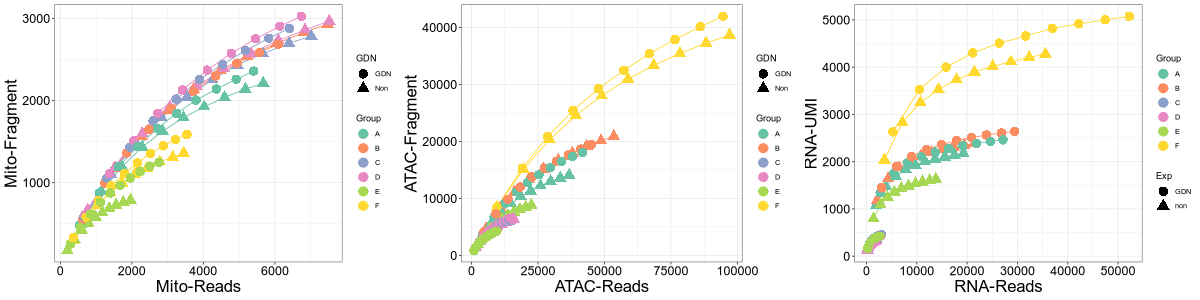

In [86]:
options(repr.plot.width=20, repr.plot.height=5,res=200)
grid.arrange(p1,p2,p3,nrow=1)

# Mouse/Human species mix analysis

## Extended Data Fig. 1b

In [92]:
Human.nonMT<-read.table(paste(Dir,"/data/optimize/HumanMouseMix/210522_ATAC_GRCH38.RawBed.Sort.Tag.dedup.summary.Nonmito",sep=""))[,c(1:2)]
Mouse.nonMT<-read.table(paste(Dir,"/data/optimize/HumanMouseMix/210522_ATAC_Mouse.RawBed.Sort.Tag.dedup.summary.Nonmito",sep=""))[,c(1:2)]
Human.mito<-read.table(paste(Dir,"/data/optimize/HumanMouseMix/210522_ATAC_GRCH38.RawBed.Sort.Tag.dedup.summary.mito",sep=""))[,c(1:2)]
Mouse.mito<-read.table(paste(Dir,"/data/optimize/HumanMouseMix/210522_ATAC_Mouse.RawBed.Sort.Tag.dedup.summary.mito",sep=""))[,c(1:2)]

names(Human.nonMT)<-c("Cell","Fragments.human")
names(Mouse.nonMT)<-c("Cell","Fragments.mouse")
names(Human.mito)<-c("Cell","Fragments.human")
names(Mouse.mito)<-c("Cell","Fragments.mouse")

In [93]:
HumanMouse.nonMT<-merge(Human.nonMT,Mouse.nonMT,by="Cell",all.x=T,all.y=T)
HumanMouse.nonMT[is.na(HumanMouse.nonMT)]<-1
HumanMouse.nonMT<-subset(HumanMouse.nonMT,Fragments.human>2000 | Fragments.mouse>2000)
HumanMouse.nonMT$Specificity<-log10(HumanMouse.nonMT$Fragments.human/HumanMouse.nonMT$Fragments.mouse)
HumanMouse.nonMT$SingleDouble<-with(HumanMouse.nonMT,ifelse(abs(Specificity)<=1,"Doublets","Singlest"))
CollisionRate=length(which(HumanMouse.nonMT$SingleDouble=="Doublets"))/nrow(HumanMouse.nonMT)
p1<-ggplot(HumanMouse.nonMT)+aes(Fragments.human,Fragments.mouse,color=SingleDouble)+geom_point()+theme_bw()+ggtitle(paste("Doublets rate: ",CollisionRate))

HumanMouse.mito<-merge(Human.mito,Mouse.mito,by="Cell",all.x=T,all.y=T)
HumanMouse.mito[is.na(HumanMouse.mito)]<-1
HumanMouse.mito<-subset(HumanMouse.mito,Cell %in% as.character(HumanMouse.nonMT$Cell))
HumanMouse.mito<-merge(HumanMouse.mito,HumanMouse.nonMT[,c("Cell","Specificity","SingleDouble")],by="Cell")
HumanMouse.mito$MitoSpecificity<-log10(HumanMouse.mito$Fragments.human/HumanMouse.mito$Fragments.mouse)

p2<-ggplot(HumanMouse.mito)+aes(Fragments.human,Fragments.mouse,color=SingleDouble)+geom_point()+theme_bw()+scale_color_manual(values=c("red","steelblue"))

In [100]:
RNAWhiteList<-read.table(paste(Dir,"/data/optimize/RNA.737K-arc-v1.txt",sep=""))
ATACWhiteList<-read.table(paste(Dir,"/data/optimize/ATAC.737K-arc-v1.txt",sep=""))
ATAC2RNA<-data.frame(row.names=ATACWhiteList$V1,RNABC=RNAWhiteList$V1)
## Translate the atac doublet names into RNA
Doublets.rnaNames<-ATAC2RNA[as.character(subset(HumanMouse.nonMT,SingleDouble=="Doublets")$Cell),]


In [101]:
##Below is map to a hg18_mm9 mix STAR index
HumanMouse.table<-read.table(paste(Dir,"/data/optimize/HumanMouseMix/HumanMouse.table",sep=""))
names(HumanMouse.table)<-c("Chr","CellBC","UMI")
HumanMouse.table$species<-strsplit(as.character(HumanMouse.table$Chr),"_") %>% sapply(.,function(x){x[2]})
HumanMouse.summmary<-as.matrix(table(HumanMouse.table$CellBC,HumanMouse.table$species))
HumanMouse.summmary.toplot<-data.frame(CellBC=row.names(HumanMouse.summmary),Human=HumanMouse.summmary[,"hg18"],Mouse=HumanMouse.summmary[,"mm9"])
HumanMouse.summmary.toplot$Cells<-strsplit(row.names(HumanMouse.summmary.toplot),":") %>% sapply(.,function(x){x[3]})
HumanMouse.summmary.toplot$SingleDouble<-ifelse(HumanMouse.summmary.toplot$Cells %in% Doublets.rnaNames,"Doublets","Singlets")

In [104]:
p3<-ggplot(HumanMouse.summmary.toplot)+aes(Human,Mouse,color=SingleDouble)+geom_point(size=0.25)+xlim(0,2500)+ylim(0,12000)+theme_bw()+scale_color_manual(values=c("red","black"))

Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”


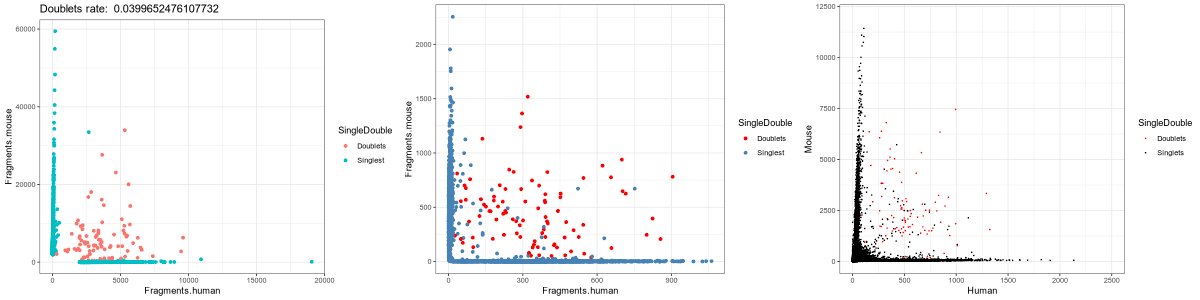

In [106]:
options(repr.plot.width=20, repr.plot.height=5,res=200)
grid.arrange(p1,p2,p3,nrow=1)

# ATAC/Mito Fragment sizes distribution

## Extended Data Fig. 1c

In [15]:
# This is a big file, make sure sufficient memory
Frag<-read.table(paste(Dir,"/data/optimize/NonGDN.atac_fragments.tsv.gz",sep=""))

In [19]:
SelectCells<-subset(NonGDN.summary,Group =="B")$cell
SelectCells.monocloneal.bed<-subset(Frag,V4 %in% SelectCells)
SelectCells.monocloneal.bed$size<-SelectCells.monocloneal.bed$V3-SelectCells.monocloneal.bed$V2

Warning message:
“Removed 27738 rows containing non-finite values (`stat_density()`).”


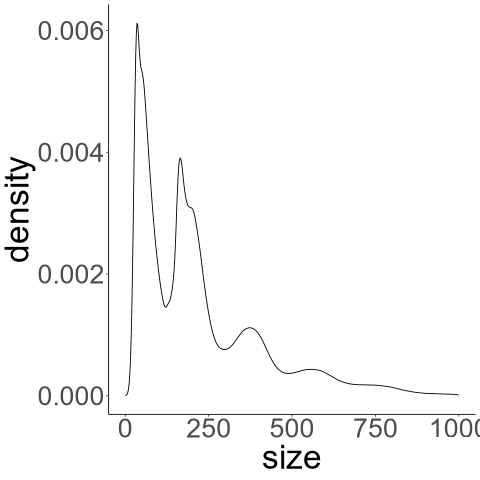

In [23]:
options(repr.plot.width=8, repr.plot.height=8,repr.plot.res=60)
ggplot(SelectCells.monocloneal.bed)+aes(size)+geom_density()+xlim(0,1000)+theme_classic()+theme(text=element_text(size=40))

## Extended Data Fig. 1d

In [30]:
MitoFragment<-read.table(paste(Dir,"/data/optimize/NonGDN.atac_fragments.mito.tsv.gz",sep=""))

Warning message:
“Removed 105 rows containing non-finite values (`stat_density()`).”


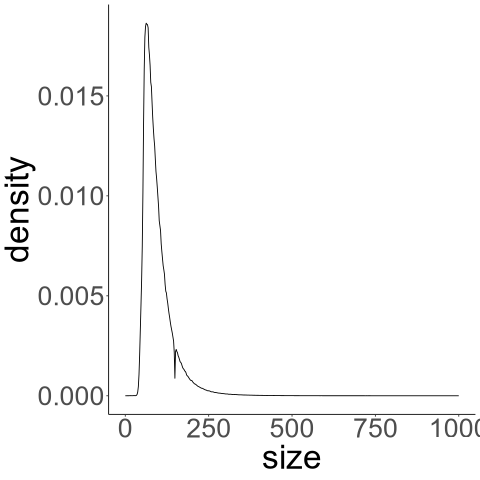

In [32]:
MitoFragment$size<-MitoFragment$V3-MitoFragment$V2
ggplot(MitoFragment)+aes(size)+geom_density()+xlim(0,1000)+theme_classic()+theme(text=element_text(size=40))